<a href="https://colab.research.google.com/github/v03012000/My-original-signature-forged-signature-classifier/blob/master/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are uploading the Kaggle API key so that we can easily download the dataset from kaggle.

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


We are setting the environment variables

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

We are ready to download the dataset from kaggle using API.
Title of my dataset is signatures.
https://www.kaggle.com/vidushi312000/signatures

In [ ]:
!kaggle datasets download -d vidushi312000/signatures

 88% 89.0M/101M [00:01<00:00, 49.1MB/s]
100% 101M/101M [00:01<00:00, 67.4MB/s] 


Now after sucessfully downloading the dataset we have to unzip it.

In [ ]:
!unzip "*.zip"

Archive:  signatures.zip
  inflating: signatures/Forged signatures/1.jpg  
  inflating: signatures/Forged signatures/10.jpg  
  inflating: signatures/Forged signatures/100.jpg  
  inflating: signatures/Forged signatures/101.jpg  
  inflating: signatures/Forged signatures/102.jpg  
  inflating: signatures/Forged signatures/103.jpg  
  inflating: signatures/Forged signatures/104.jpg  
  inflating: signatures/Forged signatures/105.jpg  
  inflating: signatures/Forged signatures/106.jpg  
  inflating: signatures/Forged signatures/107.jpg  
  inflating: signatures/Forged signatures/108.jpg  
  inflating: signatures/Forged signatures/109.jpg  
  inflating: signatures/Forged signatures/11.jpg  
  inflating: signatures/Forged signatures/110.jpg  
  inflating: signatures/Forged signatures/111.jpg  
  inflating: signatures/Forged signatures/112.jpg  
  inflating: signatures/Forged signatures/113.jpg  
  inflating: signatures/Forged signatures/114.jpg  
  inflating: signatures/Forged signatures/1

We can see that the dataset contains 2 directories. 
One folder is Original signatures which contains my original signatures and the other folder is Forged signatures which contains my forged signatures done by other people.

In [ ]:
os.listdir("signatures")

['Original signatures', 'Forged signatures']

Now we have to import some libraries which are required for training purpose.

In [ ]:
%reload_ext autoreload
import numpy as np
#!pip install "torch==1.4" "torchvision==0.5.0"
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
img_counter=[]
img_counter.append(1)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

We have to verify the images and delete the images which are not readable.

In [19]:
path=Path("signatures")
classes=['Original signatures','Forged signatures']
for c in classes:
    #print(c)
    verify_images(path/c, delete=True, max_size=500)

For training we have to define batch size. Here I have taken batchsize as 4.

In [ ]:
bs=4

We have to create a databunch object which contains the images to be trained in required format.We have applied transformations also.


In [ ]:
path=""
tfms = get_transforms()
data = ImageDataBunch.from_folder( Path("signatures"), valid_pct=0.2, bs=4, size=224, ds_tfms=get_transforms())

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.043189,0.596677,0.817204,00:10
1,0.831031,0.991872,0.655914,00:09
2,0.650065,0.359826,0.903226,00:09
3,0.624719,0.305393,0.913979,00:09


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.makedirs("/content/drive/My Drive/dl_projects/signature_recognition",exist_ok=True)

In [ ]:
my_dir="/content/drive/My Drive/dl_projects/signature_recognition"

In [ ]:
learn.save(my_dir+"/Stage-1")

Now we have sucessfully trained the model and saved the pth file.

In [18]:
learn.export(my_dir+"/export.pkl")

To plot an output of a grid of transformed images based on a function we will create a function.

The image we will be using will be from the dataset
the path of the image is '/content/signatures/Original signatures/1.jpg'

We will save the augumented images in a new directory images.

In [ ]:
import os
os.makedirs("images",exist_ok=True)
def plots_f(rows, cols, width, height, **kwargs):
  total_plots=plt.subplots(rows,cols,figsize=(width,height))[1].flatten()
  for i,ax in enumerate(total_plots):
    get_ex(pathh).apply_tfms(tfms[0], **kwargs).show(ax=ax)
    plt.savefig("images/"+str(img_counter[0])+".jpg")
    img_counter[0]+=1

In [ ]:
pathh='/content/signatures/Original signatures/1.jpg'
def get_ex(pathh): return open_image(pathh)




**Data** **augumentation**

In the training process we generally use get_transform() function to transform some of images of dataset. It returns a tuple of two lists of transforms, one for the training set and the other for the validation set.
Some of the parameters of get_transforms() are :

1 do_flip

2 flip_vert

3 max_rotate

4 max_zoom

5 max_lighting

6 max_warp

* We can use zoom_crop function to randomly zoom and/or crop.

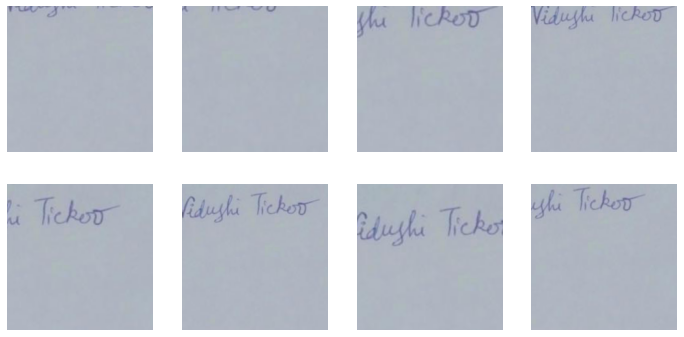

In [ ]:
tfms = zoom_crop(scale=(0.75,2), do_rand=True)
plots_f(2, 4, 12, 6, size=224)

* To randomly resize and crop the image to a ratio in ratios after a zoom of max_scale we can use rand_resize_crop function.
rand_resize_crop(size:int, max_scale:float=2.0, ratios:Point=(0.75, 1.33))

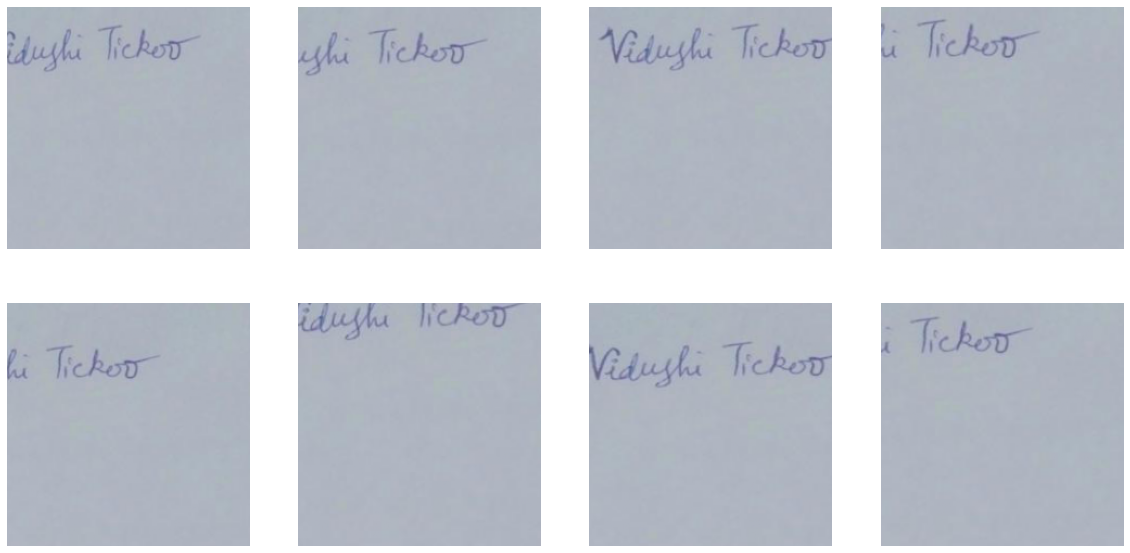

In [ ]:
tfms = [rand_resize_crop(224)]
plots_f(2, 4, 20, 10, size=224)

* To change the brightness level of the image we can use brightness function.It adjusts brightness of the image depending on the value of change. A change of 0 will transform the image to black, and a change of 1 will transform the image to white. change=0.5 doesn't adjust the brightness.


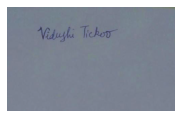

In [ ]:
def transform_brightness(pathh):
  img=brightness(get_ex(pathh),0.3)
  img.save("images/"+str(img_counter[0])+".jpg")
  img_counter[0]+=1
  img.show()
transform_brightness(pathh)
  

* To change the contrast of the image we can use contrast function.
We can provide a path of an image to this function and it will save the resulting transformed images in images folder.

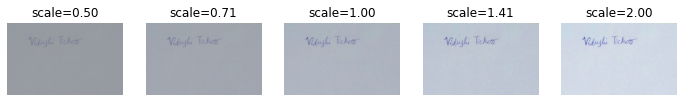

In [ ]:
def transform_contrast(pathh):
  fig, axs = plt.subplots(1,5,figsize=(12,4))
  for scale, ax in zip(np.exp(np.linspace(log(0.5),log(2),5)), axs):
      img=contrast(get_ex(pathh), scale)
      img.save("images/"+str(img_counter[0])+".jpg")
      contrast(get_ex(pathh), scale).show(ax=ax, title=f'scale={scale:.2f}')
      img_counter[0]+=1
transform_contrast(pathh)

* To apply a transform which  combines a flip (horizontal or vertical) and a rotation of a multiple of 90 degrees we can use dihedral function.
We can provide a path of an image to this function and it will save the resulting transformed images in our dataset.For this we have to provide a path where we want to save that image.

In [ ]:
onlyfiles = next(os.walk('/content/signatures/Original signatures'))[2]
l=len(onlyfiles)

In [ ]:
l=l+1
save_path='signatures/Original signatures/'+str(l)+".jpg"
def transform_dihedral(pathh,save_path):
    img=dihedral(get_ex(pathh),5)
    img.save(save_path)
    img_counter[0]+=1

We can increase our dataset by using these transforms .I am applying dihedral transform to first 50 images of Original signatures folder and I will save the transformed images in Original signatures folder. 

In [ ]:
path1='/content/signatures/Original signatures/'
for i in range(1,51):
  path=path1+str(i)+".jpg"
  l+=1
  save_path='/content/signatures/Original signatures/'+str(l)+".jpg"
  transform_dihedral(path,save_path)



* To flip an image from left to right we can use flip_lr() function.We can provide a path of an image to this function and it will save the resulting transformed images in images folder.


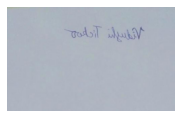

In [ ]:
save_path="images/"+str(img_counter[0])+".jpg"
def left_to_right_flip(pathh,save_path):
    img=flip_lr(get_ex(pathh))
    img.save(save_path)
    img.show()
    img_counter[0]+=1
left_to_right_flip(pathh,save_path)

* To change the pixels of the image by randomly replacing them with pixels from the neighborhood we can use jitter() function. Magnitude controls the extent of neighbourhood.

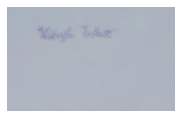

In [ ]:
save_path="images/"+str(img_counter[0])+".jpg"
def transform_jitter(pathh,save_path):
  img=get_ex(pathh).jitter(magnitude=0.03)
  img.save(save_path)
  img.show()
  img_counter[0]+=1
transform_jitter(pathh,save_path)


* squish() function will Squish image by scale. 

  row_pct,col_pct select focal point of zoom.

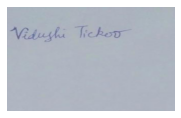

In [ ]:
save_path="images/"+str(img_counter[0])+".jpg"
def transform_squish(pathh,save_path):
  img=get_ex(pathh).squish(0.66)
  img.save(save_path)
  img.show()
  img_counter[0]+=1
transform_squish(pathh,save_path)

* rgb_randomize

By randomizing one of the three channels, the learner essentially sees the same image, but with different colors. Usually, every RGB image has one channel that is dominant, and randomizing this channel is the riskiest; thus, a low thresh (threshold) value must be applied. In this example, the Green channel is the dominant one.

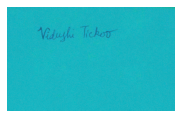

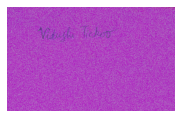

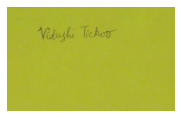

In [ ]:
save_path="images/"+str(img_counter[0])+".jpg"
def transform_rgb(pathh,save_path):
  channels = ['Red', 'Green', 'Blue']
  for i in np.arange(0, 3):
        img= get_ex(pathh).rgb_randomize(channel = i, thresh =0.596)
        img.save(save_path)
        img.show()
        img_counter[0]+=1
transform_rgb(pathh,save_path)

* tilt function

Tilt c field with random direction and magnitude.

Direction is a number (0: left, 1: right, 2: top, 3: bottom). A positive magnitude is a tilt forward (toward the person looking at the picture), a negative magnitude a tilt backward.

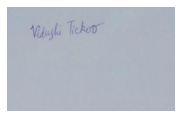

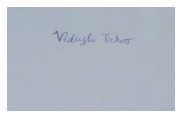

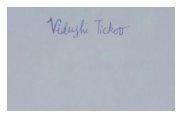

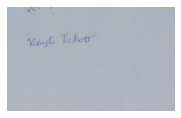

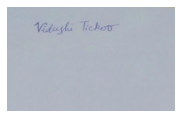

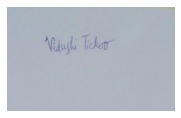

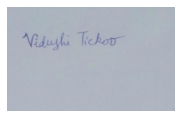

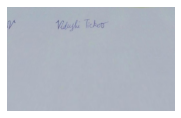

In [ ]:
save_path="images/"+str(img_counter[0])+".jpg"
def transform_tilt(pathh,save_path):
    for i in range(4):
        img1=get_ex(pathh).tilt(i, 0.4)
        img2=get_ex(pathh).tilt(i, -0.4)
    
        img1.save(save_path)
        img1.show()
        img2.show()
        img_counter[0]+=1
transform_tilt(pathh,save_path)

* Symmetric wrap

   Apply symmetric warp of magnitude to c.

   Apply the four tilts at the same time, each with a strength given in the vector magnitude

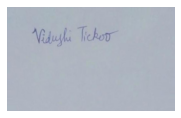

In [ ]:
save_path="images/"+str(img_counter[0])+".jpg"
def transform_symw(pathh,save_path):
    tfm = symmetric_warp(magnitude=(-0.2,0.2))
    img = get_ex(pathh).apply_tfms(tfm, padding_mode='border')
    img.save(save_path)
    img.show()
    img_counter[0]+=1   
transform_symw(pathh,save_path)



We have tried almost all the transforms sucessfully.